In [ ]:
%matplotlib inline


# An mvlearn case study: the Nutrimouse dataset

In this tutorial, we show how one may utilize various tools of mvlearn. We
demonstrate applications to the :class:`mvlearn.datasets.load_nutrimouse`
dataset from a nutrition study on
mice. The data measures 40 mice and has two views: expression levels of
potentially relevant genes and concentrations of certain fatty acids. Each
mouse has two labels: it's genetic type and diet.

.. [1] P. Martin, H. Guillou, F. Lasserre, S. Déjean, A. Lan, J-M.
    Pascussi, M. San Cristobal, P. Legrand, P. Besse, T. Pineau.
    "Novel aspects of PPARalpha-mediated regulation of lipid and
    xenobiotic metabolism revealed through a nutrigenomic study."
    Hepatology, 2007.


In [ ]:
# Authors: Ronan Perry
#
# License: MIT

## Load the Nutrimouse dataset



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mvlearn.datasets import load_nutrimouse

dataset = load_nutrimouse()
Xs = [dataset['gene'], dataset['lipid']]
y = np.vstack((dataset['genotype'], dataset['diet'])).T

print(f"Shapes of each view: {[X.shape for X in Xs]}")

Shapes of each view: [(40, 120), (40, 21)]


In [2]:
Xs

[array([[-0.42, -0.65, -0.84, ..., -1.24, -0.85, -0.03],
        [-0.44, -0.68, -0.91, ..., -1.2 , -0.84, -0.12],
        [-0.48, -0.74, -1.1 , ..., -1.35, -0.96, -0.12],
        ...,
        [-0.48, -0.71, -0.63, ..., -1.3 , -0.89, -0.48],
        [-0.3 , -0.58, -0.88, ..., -1.22, -0.84, -0.28],
        [-0.44, -0.66, -0.96, ..., -1.2 , -0.87, -0.36]]),
 array([[ 0.34, 26.45, 10.22,  0.35,  3.1 , 16.98,  2.41,  0.26,  0.  ,
          8.93,  0.  ,  0.  ,  0.78,  3.07,  0.  ,  0.  ,  5.97,  0.37,
          8.62,  1.75, 10.39],
        [ 0.38, 24.04,  9.93,  0.55,  2.54, 20.07,  3.92,  0.23,  0.  ,
         14.98,  0.3 ,  0.3 ,  1.64, 15.34,  0.58,  2.1 ,  0.  ,  0.  ,
          0.  ,  0.48,  2.61],
        [ 0.36, 23.7 ,  8.96,  0.55,  2.65, 22.89,  3.96,  0.26,  0.19,
         16.06,  0.27,  0.33,  1.51, 13.27,  0.54,  1.77,  0.  ,  0.  ,
          0.  ,  0.22,  2.51],
        [ 0.22, 25.48,  8.14,  0.49,  2.82, 21.92,  2.52,  0.  ,  0.  ,
         13.89,  0.  ,  0.  ,  1.1 ,  3.92,  0

## Embed using MVMDS

Multiview multidimensional scaling (:class:`mvlearn.embed.MVMDS`) embeds
multiview data into a single representation that captures information shared
between both views. Embedding the two nutrimouse views, we can observe clear
separation between the different genotypes and some of the diets too.



/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplot

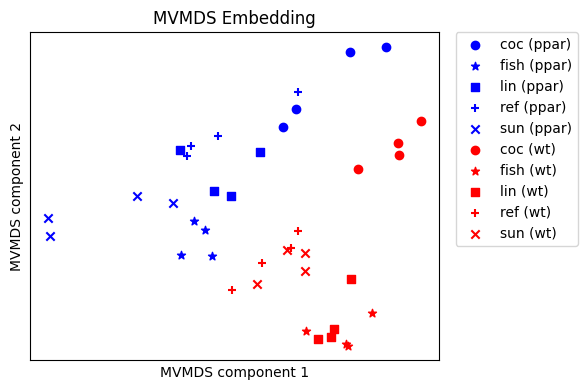

In [17]:
from mvlearn.embed import MVMDS  # noqa: E402

X_mvmds = MVMDS(n_components=2, num_iter=50).fit_transform(Xs)

diet_names = dataset['diet_names']
genotype_names = dataset['genotype_names']
plt.figure(figsize=(6, 4))
for genotype_idx, color in enumerate(('Blue', 'Red')):
    for diet_idx, marker in enumerate(('o', '*', 's', '+', 'x')):
        X_idx = np.where((y == (genotype_idx, diet_idx)).all(axis=1))
        label = diet_names[diet_idx] + f' ({genotype_names[genotype_idx]})'
        plt.scatter(*zip(*X_mvmds[X_idx]), c=color, label=label, marker=marker)

plt.xlabel('MVMDS component 1')
plt.ylabel('MVMDS component 2')
plt.title('MVMDS Embedding')
plt.xticks([])
plt.yticks([])
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

## Cluster using Multiview KMeans

We can compare the estimated clusters from
:class:`mvlearn.cluster.MultiviewKMeans` to regular
KMeans on each of the views. Multiview Kmeans clearly finds two clusters
matching the two different genotype labels observed in the prior plots.



/home/eshevtsova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: s

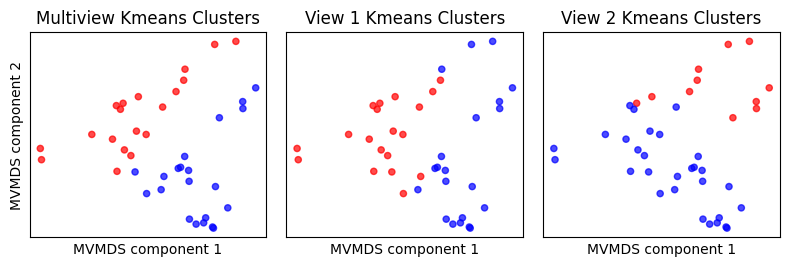

In [18]:
from mvlearn.cluster import MultiviewKMeans  # noqa: E402
from sklearn.cluster import KMeans  # noqa: E402

Xs_labels = MultiviewKMeans(n_clusters=2, random_state=0).fit_predict(Xs)
X1_labels = KMeans(n_clusters=2, random_state=0).fit_predict(Xs[0])
X2_labels = KMeans(n_clusters=2, random_state=0).fit_predict(Xs[1])

sca_kwargs = {'alpha': 0.7, 's': 20}
colors = np.asarray(['Red', 'Blue'])
f, axes = plt.subplots(1, 3, figsize=(8, 4))
axes[0].scatter(*zip(*X_mvmds), c=colors[Xs_labels], **sca_kwargs)
axes[0].set_title('Multiview Kmeans Clusters')
axes[1].scatter(*zip(*X_mvmds), c=colors[X1_labels], **sca_kwargs)
axes[1].set_title('View 1 Kmeans Clusters')
axes[2].scatter(*zip(*X_mvmds), c=colors[X2_labels], **sca_kwargs)
axes[2].set_title('View 2 Kmeans Clusters')

for ax in axes:
    ax.set_xlabel('MVMDS component 1')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
axes[0].set_ylabel('MVMDS component 2')
axes[0].set_title('Multiview Kmeans Clusters')
plt.tight_layout()
plt.show()

## Decomposition using AJIVE

We can also apply joint decomposition tools to find features across views
that are jointly related. Using :class:`mvlearn.decomposition.AJIVE`, we can
find genes and lipids that are jointly related.



/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplot

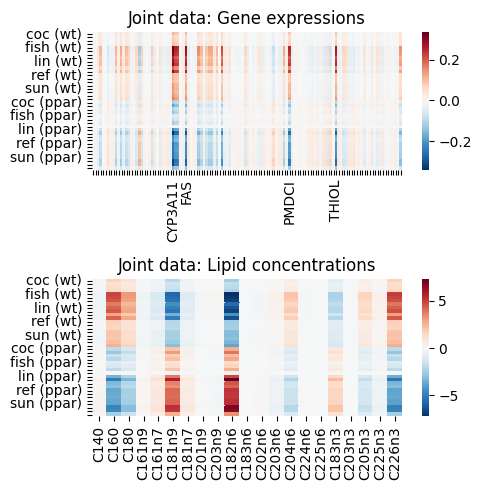

In [19]:
from mvlearn.decomposition import AJIVE  # noqa: E402

ajive = AJIVE()
Xs_joint = ajive.fit_transform(Xs)

f, axes = plt.subplots(2, 1, figsize=(5, 5))
sort_idx = np.hstack((np.argsort(y[:20, 1]), np.argsort(y[20:, 1]) + 20))
y_ticks = [diet_names[j] + f' ({genotype_names[i]})' if idx %
           4 == 0 else '' for idx, (i, j) in enumerate(y[sort_idx])]

gene_ticks = [n if i in [31, 36, 76, 94] else '' for i,
              n in enumerate(dataset['gene_feature_names'])]
g = sns.heatmap(Xs_joint[0][sort_idx],
                yticklabels=y_ticks, cmap="RdBu_r", ax=axes[0],
                xticklabels=gene_ticks)
axes[0].set_title('Joint data: Gene expressions')

sns.heatmap(Xs_joint[1][sort_idx],
            yticklabels=y_ticks, cmap="RdBu_r", ax=axes[1],
            xticklabels=dataset['lipid_feature_names'])
axes[1].set_title('Joint data: Lipid concentrations')
plt.tight_layout()
plt.show()

## Inference using regularized CCA

Canonical Correlation Analysis (:class:`mvlearn.embed.CCA`)
finds separate linear projections of views which are maximally
correlated. We can so embed the data jointly and observe that the first two
embeddings are highly correlated and capture the differences between
genetic types. One can use this to construct a single view
for subsequent inference, or to examine the loading weights across views.
Because the genetic expression data has more features than samples, we need
to use regularization so as to not to trivially overfit.



/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/eshevtsova/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplot

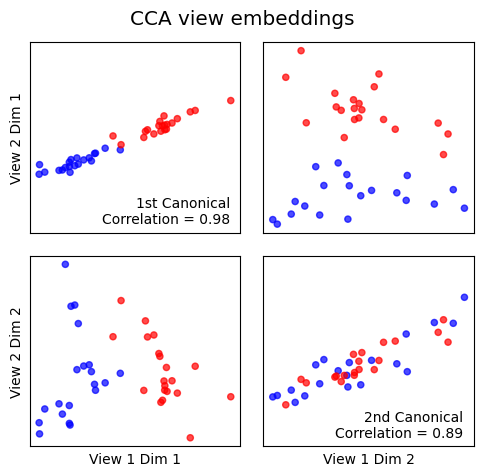

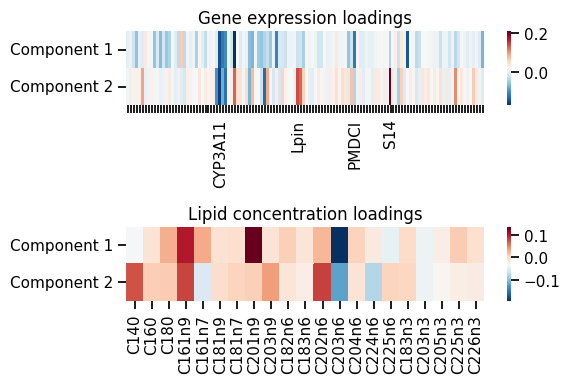

In [20]:
from mvlearn.plotting import crossviews_plot  # noqa: E402
from mvlearn.embed import CCA  # noqa: E402

cca = CCA(n_components=2, regs=[0.9, 0.1])
Xs_cca = cca.fit_transform(Xs)

y_labels = [diet_names[j] + f' ({genotype_names[i]})' for (i, j) in y]
f, axes = crossviews_plot(
    Xs_cca, labels=np.asarray(['Red', 'Blue'])[y[:, 0]],
    ax_ticks=False, figsize=(5, 5), equal_axes=True,
    title='CCA view embeddings', scatter_kwargs=sca_kwargs,
    show=False)
corr1, corr2 = cca.canon_corrs(Xs_cca)
axes[0, 0].annotate(
    f'1st Canonical\nCorrelation = {corr1:.2f}', xy=(0.95, 0.05),
    xycoords='axes fraction', fontsize=10, ha='right')
axes[1, 1].annotate(
    f'2nd Canonical\nCorrelation = {corr2:.2f}', xy=(0.95, 0.05),
    xycoords='axes fraction', fontsize=10, ha='right')
plt.show()

f, axes = plt.subplots(2, 1, figsize=(6, 4))
gene_ticks = [n if i in [31, 57, 76, 88] else '' for i,
              n in enumerate(dataset['gene_feature_names'])]
g = sns.heatmap(cca.loadings_[0].T,
                yticklabels=['Component 1', 'Component 2'],
                cmap="RdBu_r", ax=axes[0],
                xticklabels=gene_ticks)
g.set_xticklabels(gene_ticks, rotation=90)
g.set_yticklabels(g.get_yticklabels(), va="center")
axes[0].set_title('Gene expression loadings')

g = sns.heatmap(cca.loadings_[1].T,
                yticklabels=['Component 1', 'Component 2'],
                cmap="RdBu_r", ax=axes[1],
                xticklabels=dataset['lipid_feature_names'])
g.set_yticklabels(g.get_yticklabels(), va="center")
axes[1].set_title('Lipid concentration loadings')
plt.tight_layout()
plt.show()